
<span style="font-size: 24px;">Importing all the necessary libraries</span>


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split


<span style="font-size: 24px;">Loading test and train datasets</span>

In [62]:
data_csv = pd.read_csv("C:\\Users\\Рома Кучерявий\\PycharmProjects\\pythonProject\\venv\\Steal_Plate\\train.csv")
test_csv = pd.read_csv("C:\\Users\\Рома Кучерявий\\PycharmProjects\\pythonProject\\venv\\Steal_Plate\\test.csv")


<span style = "font-size: 24px;">Preparation and analysis data</span>

In [23]:
data = pd.DataFrame(data = data_csv)

In [24]:
data.keys()

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [25]:
data.head(15)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
5,5,1009,1033,899231,899307,409,22,26,47513,86,...,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1
6,6,596,607,739072,7390760,204,21,21,22478,89,...,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0
7,7,1673,1687,294065,294091,571,38,57,53142,77,...,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0
8,8,507,521,203252,203261,101,25,12,12530,124,...,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
9,9,893,907,1341292,1341296,54,6,15,7052,87,...,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0


In [223]:
data.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
data.nunique()

id                       19219
X_Minimum                 1191
X_Maximum                 1259
Y_Minimum                 3345
Y_Maximum                 3341
Pixels_Areas              1154
X_Perimeter                460
Y_Perimeter                331
Sum_of_Luminosity         2595
Minimum_of_Luminosity      162
Maximum_of_Luminosity       98
Length_of_Conveyer          99
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       27
Edges_Index               1849
Empty_Index               1748
Square_Index              1118
Outside_X_Index            525
Edges_X_Index             1102
Edges_Y_Index              900
Outside_Global_Index         4
LogOfAreas                1072
Log_X_Index                206
Log_Y_Index                241
Orientation_Index         1598
Luminosity_Index          2046
SigmoidOfAreas             467
Pastry                       2
Z_Scratch                    2
K_Scatch                     2
Stains                       2
Dirtines

In [224]:
data.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [225]:
data.X_Maximum

0         590
1         816
2         192
3         789
4        1560
         ... 
19214     757
19215     735
19216      31
19217      18
19218    1525
Name: X_Maximum, Length: 19219, dtype: int64

(array([2418., 3711.,  729., 1940., 1674., 1564., 2726., 2491.,  511.,
        1455.]),
 array([   4. ,  174.9,  345.8,  516.7,  687.6,  858.5, 1029.4, 1200.3,
        1371.2, 1542.1, 1713. ]),
 <BarContainer object of 10 artists>)

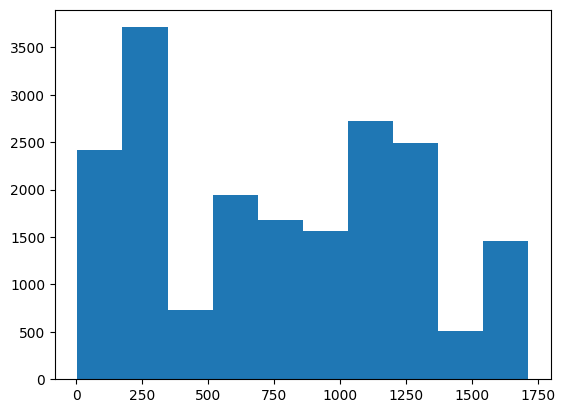

In [79]:
plt.hist(data.X_Maximum)

In [80]:
X_train_ = data.drop(columns = ['id','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'])
y_train_ = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

<span style =" font-size : 24px;">Split the data and fit LogisticRegression and RandomForestClassifier models</span>

In [81]:
X_train , X_test , y_train , y_test = train_test_split(X_train_ , y_train_ , test_size = 0.3 , random_state =42)

In [33]:
#model_linear = LinearRegression()
model_logistic = LogisticRegression(random_state = 42)
model_randforest = RandomForestClassifier()

In [34]:
#multy_linear = MultiOutputClassifier(model_linear , n_jobs = -1)
multy_log = MultiOutputClassifier(model_logistic, n_jobs = -1)
multy_forest = MultiOutputClassifier(model_randforest, n_jobs = -1)

In [35]:
#lin_score = roc_auc_score(multy_linear , X_train , y_train) 
multy_log.fit(X_train,y_train)
multy_forest.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(), n_jobs=-1)

In [65]:
test_id = test_csv.id
test_csv = test_csv.drop(columns = "id")

In [55]:
pred_log = multy_log.predict_proba(test_csv)
pred_forest = multy_forest.predict_proba(test_csv)

In [57]:
data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']].sum()

Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64

In [70]:
submission = pd.DataFrame({"id" : test_id})
for i, target in enumerate(y_train.columns):
    submission[target] = pred_forest[i][:,1]
    print(submission)

          id  Pastry
0      19219    0.25
1      19220    0.29
2      19221    0.00
3      19222    0.19
4      19223    0.00
...      ...     ...
12809  32028    0.08
12810  32029    0.21
12811  32030    0.00
12812  32031    0.36
12813  32032    0.00

[12814 rows x 2 columns]
          id  Pastry  Z_Scratch
0      19219    0.25       0.02
1      19220    0.29       0.05
2      19221    0.00       0.11
3      19222    0.19       0.03
4      19223    0.00       0.05
...      ...     ...        ...
12809  32028    0.08       0.19
12810  32029    0.21       0.01
12811  32030    0.00       0.00
12812  32031    0.36       0.03
12813  32032    0.00       0.01

[12814 rows x 3 columns]
          id  Pastry  Z_Scratch  K_Scatch
0      19219    0.25       0.02      0.00
1      19220    0.29       0.05      0.01
2      19221    0.00       0.11      0.05
3      19222    0.19       0.03      0.00
4      19223    0.00       0.05      0.00
...      ...     ...        ...       ...
12809  32028    0.

In [59]:
submission.max()

Pastry          0.168736
Z_Scratch       0.582817
K_Scatch        1.000000
Stains          0.994166
Dirtiness       0.163266
Bumps           0.500972
Other_Faults    0.462088
dtype: float64

In [67]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.058512,0.030541,0.019493,1.030307e-19,0.016397,0.258863,0.355185
1,19220,0.128678,0.032753,0.014994,8.968600e-11,0.034369,0.316631,0.424400
2,19221,0.136405,0.029040,0.011641,4.115311e-08,0.034799,0.329661,0.435131
3,19222,0.068361,0.110343,0.060432,4.132500e-03,0.020291,0.243962,0.341845
4,19223,0.073378,0.063816,0.029883,1.158496e-04,0.019428,0.262583,0.360816
...,...,...,...,...,...,...,...,...
12809,32028,0.127075,0.041209,0.019430,3.874414e-08,0.035822,0.316234,0.419385
12810,32029,0.119838,0.035013,0.012689,2.041714e-01,0.040600,0.393686,0.424832
12811,32030,0.000227,0.000523,0.998982,0.000000e+00,0.000011,0.000011,0.028255
12812,32031,0.126988,0.029321,0.013185,5.013790e-11,0.033466,0.321055,0.426116


<span style = "font-size: 24px;">Create a submission file</span>

In [71]:
submission.to_csv("steel_plate_randForest.csv" , index = False)
